100%|██████████| 8990/8990 [00:00<00:00, 19007.59it/s]


Images:  (8990, 128, 128, 3)
Labels:  (8990, 2)
94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 24,637,826
Trainable params: 1,050,114
Non-trainable params: 23,587,712
_________________________________________________________________
Epoch 1/20
225/225 [==============================] - 19s

100%|██████████| 1890/1890 [00:27<00:00, 69.74it/s] 


Images:  (1890, 128, 128, 3)
Labels:  (1890, 2)
Count:  1890
60/60 [==============================] - 3s 27ms/step
[0 0 1 ... 0 0 1]
[0 0 0 ... 0 0 0]
0
0
0
0
0
0
1
1
1
1
0
0
0
1
1
0
0
0
1
0
0
1
0
1
0
0
0
1
1
1
0
1
1
1
1
0
1
1
0
1
1
0
1
0
1
1
1
0
1
0
1
0
1
1
1
1
0
0
1
0
1
0
1
0
0
1
0
1
0
0
0
1
1
0
1
0
0
1
0
1
0
0
0
1
1
0
1
1
0
0
1
1
0
1
0
0
0
0
1
1
0
1
0
0
1
1
0
1
1
0
0
1
0
0
0
0
0
0
0
1
0
1
0
1
1
0
0
0
0
1
0
0
1
1
0
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
1
1
1
0
1
1
1
1
1
0
0
0
1
1
0
0
0
1
0
0
0
1
0
1
0
0
0
0
1
1
0
0
1
1
0
0
1
1
0
1
0
1
0
1
1
1
1
0
1
0
0
1
1
0
0
0
1
0
1
0
1
0
0
0
0
1
0
1
0
1
0
0
1
0
0
0
0
0
0
0
1
0
1
0
1
1
1
0
1
0
0
0
0
1
1
0
1
1
1
0
1
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
1
1
1
1
0
1
1
1
1
1
0
0
1
1
1
1
0
1
1
0
1
1
1
0
1
0
0
0
1
1
0
0
1
0
1
1
0
1
0
0
0
1
0
1
1
0
0
1
0
0
1
0
0
1
0
0
0
0
1
1
0
0
0
1
1
1
0
0
1
0
0
1
0
1
1
0
0
1
0
1
0
1
1
0
0
0
0
0
0
1
1
0
1
0
1
0
0
1
0
0
0
1
1
1
0
1
1
0
0
0
1
1
0
1
1
0
0
0
1
0
1
1
0
0
0
1
0
0
0
1
0
1
0
1
0
1
1
1
1
1
0
0
0
0
0
1
1
0
0
0
1
1
0
1
1

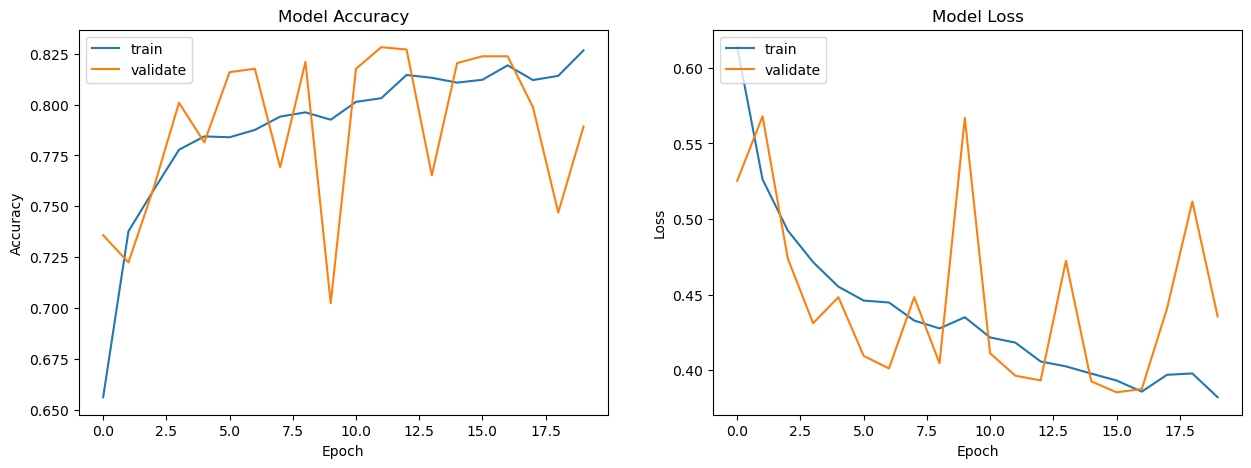

In [1]:
import math
import numpy as np
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.models import Sequential
import tensorflow as tflow
from tensorflow.keras.layers import Flatten
from keras.layers.core import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import os
import scipy
from sklearn.metrics import accuracy_score, log_loss, f1_score, precision_score, recall_score
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt

# def identity_block(X, f, filters, stage, block):
#     """
#     Implementation of the identity block as defined in Figure   

#     Parameters
#     ----------
#     X : tensor
#         input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
#     f : integer
#         specifying the shape of the middle CONV's window for the main path
#     filters : list
#         python list of integers, defining the number of filters in the CONV layers of the main path
#     stage : integer
#         used to name the layers, depending on their position in the network
#     block : str
#         used to name the layers, depending on their position in the network

#     Returns
#     -------
#     X : tensor
#         output of the identity block, tensor of shape (n_H, n_W, n_C)
#     """

#     # defining name basis
#     conv_name_base = 'res' + str(stage) + block + '_branch'
#     bn_name_base = 'bn' + str(stage) + block + '_branch'

#     # Retrieve Filters
#     F1, F2, F3 = filters

#     # Save the input value. we'll need this later to add back to the main path. 
#     X_shortcut = X

#     # First component of main path
#     X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', 
#                name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
#     X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
#     X = Activation('relu')(X)

#     # Second component of main path
#     X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', 
#                name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
#     X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
#     X = Activation('relu')(X)

#     # Third component of main path
#     X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', 
#                name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
#     X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

#     # Final step: Add shortcut value to main path, and pass it through a RELU activation
#     X = Add()([X, X_shortcut])
#     X = Activation('relu')(X)

#     return X


# def convolutional_block(X, f, filters, stage, block, s=2):
#     """
#     Implementation of the convolutional block as defined in Figure   

#     Parameters
#     ----------
#     X : tensor
#         input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
#     f : integer
#         specifying the shape of the middle CONV's window for the main path
#     filters : list
#         python list of integers, defining the number of filters in the CONV layers of the main path
#     stage : integer
#         used to name the layers, depending on their position in the network
#     block : str
#         used to name the layers, depending on their position in the network
#     s : integer, optional
#         Integer, specifying the stride to be used. The default is 2.

#     Returns
#     -------
#     X : tensor
#         output of the convolutional block, tensor of shape (n_H, n_W, n_C)
#     """

#     # defining name basis
#     conv_name_base = 'res' + str(stage) + block + '_branch'
#     bn_name_base = 'bn' + str(stage) + block + '_branch'

#     # Retrieve Filters
#     F1, F2, F3 = filters

#     # Save the input value
#     X_shortcut = X

#     # First component of main path 
#     X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
#     X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
#     X = Activation('relu')(X)

#     # Second component of main path (≈3 lines)
#     X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
#     X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
#     X = Activation('relu')(X)

#     # Third component of main path (≈2 lines)
#     X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
#     X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

#     ##### SHORTCUT PATH #### (≈2 lines)
#     X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
#     X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

#     # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
#     X = Add()([X, X_shortcut])
#     X = Activation('relu')(X)

#     return X


# def ResNet50(input_shape, outputClasses):
#     """
#     Implementation of the popular ResNet50 the following architecture:
#     CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
#     -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

#     Parameters
#     ----------
#     input_shape : tuple, optional
#         shape of the input image. 
#     outputClasses : integer, optional
#         number of classes. 

#     Returns
#     -------
#     model : object
#         a Model() instance in Keras
#     """
    
#     # Define the input as a tensor with shape input_shape
#     X_input = Input(input_shape)

#     # Zero-Padding
#     X = ZeroPadding2D((3, 3))(X_input)

#     # Stage 1
#     X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
#     X = BatchNormalization(axis=3, name='bn_conv1')(X)
#     X = Activation('relu')(X)
#     X = MaxPooling2D((3, 3), strides=(2, 2))(X)

#     # Stage 2
#     X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
#     X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
#     X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

#     # Stage 3 
#     X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
#     X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
#     X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
#     X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

#     # Stage 4
#     X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
#     X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
#     X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
#     X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
#     X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
#     X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

#     # Stage 5
#     X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
#     X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
#     X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

#     # AVGPOOL 
#     X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)

#     # output layer
#     X = Flatten()(X)
#     X = Dense(outputClasses, activation='softmax', name='fc' + str(outputClasses), 
#               kernel_initializer=glorot_uniform(seed=0))(X)

#     # Create model
#     model = Model(inputs=X_input, outputs=X, name='ResNet50')

#     return model


def Resnet50Pretrained():
    
    demo_resnet_model = Sequential(name='resnet50')

    pretrained_model_for_demo= tflow.keras.applications.ResNet50(include_top=False,

                   input_shape=(128,128,3),

                   pooling='avg',classes=2,

                   weights='imagenet')

    for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

    demo_resnet_model.add(pretrained_model_for_demo)
    demo_resnet_model.add(Flatten())

    demo_resnet_model.add(Dense(512, activation='relu'))

    demo_resnet_model.add(Dense(2, activation='softmax'))

    demo_resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

    demo_resnet_model.summary()
    
    return demo_resnet_model
    



number_of_images = 8990
epochs = 20
batch_size = 32
input_shape=(128, 128, 3)
classes=2
number_of_test_images = 1890


# write a function to load the images, the function will have 2 parameters: the path to the images and the number of images\
# the function will return a numpy array of images

def load_images(path, number_of_images):
    images = np.zeros((number_of_images, 128, 128, 3))
    for i in tqdm(range(number_of_images)):

        # check if the image is valid, if it is not valid, skip it
        if not os.path.isfile(path + str(i) + '.jpg'):
            continue

        img = cv2.imread(path + str(i) + '.jpg')
        img = cv2.resize(img, (128, 128))
        images[i] = img

    return images




# write a function to train the model
# the function has 5 parameters: the model, the images, the labels, the batch size and the number of epochs
# the function will write the training history to a csv file
# the function will return the model

def train(model, images, labels, batch_size, epochs):
    # split the data into training and validation sets
    x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)
    # train the model
    history = model.fit(x_train, y_train, x_val, y_val, batch_size, epochs)
    # write the training history to a csv file
    pd.DataFrame(history.history).to_csv('/kaggle/working/history.csv')
    
    return model


train_directory = '/kaggle/input/train-data9000/Data_V2/Train'
test_directory = '/kaggle/input/train-data9000/Data_V2/Test'


# use the "train_labels.csv" file to load the images, the first column is the image name and the second column is the corresponding label
# the images will have path: "train_directory + image_name"
# the labels will be the second column of the csv file

train_labels = pd.read_csv('/kaggle/input/train-data9000/Data_V2/train_labels.csv')

# load the images serially from reading the csv file and save the names of the images in a list

image_names = []

images = np.zeros((number_of_images, 128, 128, 3))
for i in tqdm(range(number_of_images)):

    # check if the image is valid, if it is not valid, skip it
    if not os.path.isfile(train_directory + '/' + train_labels.iloc[i, 0]):
        continue

    img = cv2.imread(train_directory + '/' + train_labels.iloc[i, 0])
    img = cv2.resize(img, (128, 128))
    
    # normalize the images
    img = img / 255.0

    images[i] = img

    image_names.append(train_labels.iloc[i, 0])



# load the labels serially from reading the csv file
# perform one-hot encoding on the labels, 'person' will be [0, 1] and 'non-person' will be [1, 0]
# save the labels in a list

person_noPerson_list = []

labels = np.zeros((number_of_images, 2))
for i in tqdm(range(number_of_images)):
    if train_labels.iloc[i, 1] == 'person':
        labels[i] = [0, 1]
    else:
        labels[i] = [1, 0]

    person_noPerson_list.append(train_labels.iloc[i, 1])


# print the shape of the images and labels
print('Images: ', images.shape)
print('Labels: ', labels.shape)


# model = ResNet50(input_shape=(224,128, 3), outputClasses=2)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

model = Resnet50Pretrained()


x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)
    # train the model
history = model.fit(x_train, y_train, epochs = 20, batch_size = 32,validation_data=(x_val, y_val))
    # write the training history to a csv file
pd.DataFrame(history.history).to_csv('/kaggle/working/history.csv')


test_labels = pd.read_csv('/kaggle/input/train-data9000/Data_V2/test_labels.csv')

# load the images serially from reading the csv file and save the names of the images in a list

test_image_names = []

test_images = np.zeros((number_of_test_images, 128, 128, 3))
labels = np.zeros((number_of_test_images, 2))
count = 0
for i in tqdm(range(number_of_test_images)):
    # check if the image is valid, if it is not valid, skip it
    if not os.path.isfile(test_directory + '/' + test_labels.iloc[i, 0]):
        continue
        
    # print(test_directory + '/' + test_labels.iloc[i, 0])
    img = cv2.imread(test_directory + '/' + test_labels.iloc[i, 0])
    
    if img is not None:
        count += 1

        img = cv2.resize(img, (128, 128))
        
        # normalize the images
        img = img / 255.0

        test_images[i] = img

        # test_image_names.append(test_labels.iloc[i, 0])

        if test_labels.iloc[i, 1] == 'person':
            labels[i] = [0, 1]
        else:
            labels[i] = [1, 0]


print('Images: ', test_images.shape)
print('Labels: ', labels.shape)
print('Count: ', count)

# predict the labels
predictions = model.predict(test_images)

# perform one-hot encoding on the predictions

predictions = np.argmax(predictions, axis=1)

# print the predictions
print(predictions)

# perform one-hot encoding on the test labels and measure the accuracy
labels = np.argmax(labels, axis=1)

# print the test labels
print(labels)

for i in range(0,1500):
    print(labels[i])

accuracy = accuracy_score(labels, predictions)

f1Score = f1_score(labels, predictions)

Recall = recall_score(labels, predictions)

Precision = precision_score(labels, predictions)

# print the accuracy
print('Accuracy: ', accuracy)

# print the f1 score
print('F1 Score: ', f1Score)

# print the recall
print('Recall: ', Recall)

# print the precision
print('Precision: ', Precision)

def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

print('Plots')

plotmodelhistory(history)